<a href="https://colab.research.google.com/github/Sonia-devi/FINAL_RESEARCH_PROJECT/blob/main/Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel(r"/content/transformed dataset.xlsx")


In [3]:
df.head()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.0,1.0,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.0,1.0,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.0,4.0,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.0,4.0,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.0,2.0,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age Group                          295 non-null    int64  
 1   Handedness                         295 non-null    int64  
 2   Gender                             295 non-null    int64  
 3   Job Function                       295 non-null    int64  
 4   Weight                             291 non-null    float64
 5   Height                             289 non-null    float64
 6   BMI                                287 non-null    float64
 7   Aviation Sector                    291 non-null    float64
 8   Flight Hours                       166 non-null    float64
 9   Flight Type                        205 non-null    float64
 10  Bed Time                           294 non-null    float64
 11  Sleep Latency                      294 non-null    float64

In [5]:
df.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,NaN,NaN,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,NaN,NaN,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,NaN,NaN,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,NaN,NaN,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,NaN,NaN,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [6]:
df.shape

(295, 28)

In [8]:
#finding the duplicate values
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

if initial_rows == final_rows:
  print("No Duplicate Values Found.")
else:
  print("Duplicate Values Found and Dropped")

#Handle missing values, if any
if df.isnull().sum().sum() == 0:
  print("No Missing Values Found.")
else:
  print("Missing Values Found and Handled.")

No Duplicate Values Found.
Missing Values Found and Handled.


In [9]:
#Due to missing values (NaN), I performed "Imputation" which enabled me to fill in missing values with estimated values and I did this due to the size of my dataset, because if I had dropped the columns with Null (NaN) values it would reduce my dataset drastically.

df_2= df.fillna(df.mean())

df_2

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
0,1,1,0,1,102.0,1.84,30.127599,1.0,5000.000000,1.000000,...,0,1,0,1.0,0.0,0,0.0,0.0,0,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.000000,1.000000,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
2,1,1,0,1,80.0,2.00,20.000000,1.0,6100.000000,4.000000,...,0,0,0,0.0,0.0,0,3.0,1.0,3,1
3,1,1,0,1,80.0,1.75,26.122449,1.0,6000.000000,4.000000,...,0,0,0,0.0,0.0,0,1.0,1.0,0,2
4,0,1,0,1,89.0,1.78,28.089888,1.0,1000.000000,2.000000,...,1,0,0,1.0,1.0,0,3.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2


In [10]:
# Initialize the imputer with the mean strategy
imputer = SimpleImputer(strategy='mean')


In [11]:
df_2.tail()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
290,0,1,0,5,105.0,1.88,29.708013,4.0,7755.638554,2.263415,...,3,0,0,1.0,0.0,1,2.0,0.0,2,0
291,1,1,0,3,60.0,1.66,21.773842,4.0,7755.638554,2.263415,...,0,0,0,0.0,1.0,0,2.0,0.0,0,2
292,2,0,0,2,100.0,1.90,27.700831,4.0,7755.638554,2.263415,...,0,1,0,0.0,0.0,3,3.0,0.0,3,2
293,2,1,1,3,72.0,1.67,25.816630,4.0,7755.638554,2.263415,...,0,0,1,0.0,1.0,0,0.0,0.0,3,2
294,3,1,0,3,90.0,1.78,28.405504,4.0,7755.638554,2.263415,...,0,0,0,0.0,0.0,0,1.0,0.0,0,2


In [12]:
df_2.describe() #(calculating some statistical data like percentile, mean and std of the numerical values )

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,1.884746,0.894915,0.233898,2.423729,81.473952,1.763744,26.151228,1.439863,7755.638554,2.263415,...,0.220339,0.294915,0.386441,0.795222,0.649660,0.552542,0.955631,0.299320,1.755932,1.674576
std,1.121954,0.394444,0.431975,1.812686,16.806353,0.088335,4.826239,0.811687,3961.099000,1.039649,...,0.635348,0.776663,0.773599,1.087519,0.974007,0.923863,1.178641,0.694144,1.027558,0.734845
min,0.000000,0.000000,0.000000,1.000000,52.000000,1.500000,17.577069,1.000000,56.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,71.000000,1.700000,23.315049,1.000000,6050.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,80.000000,1.780000,25.816630,1.000000,7755.638554,2.263415,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,1.000000,0.000000,4.000000,90.000000,1.830000,27.755102,2.000000,8000.000000,2.263415,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,2.000000
max,5.000000,2.000000,2.000000,6.000000,190.000000,2.000000,65.743945,5.000000,22000.000000,6.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [13]:
df_2.sample(frac=0.5) # (get a subset of random rows or columns)

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
119,1,1,0,1,80.0,1.80,24.691358,1.0,1500.000000,4.000000,...,1,0,0,1.0,1.0,0,0.0,0.0,2,1
55,3,0,0,1,80.0,1.79,24.968010,1.0,9400.000000,2.000000,...,0,0,0,0.0,1.0,0,0.0,0.0,1,2
1,3,1,0,1,82.7,1.78,26.101502,1.0,4200.000000,1.000000,...,0,0,0,0.0,1.0,3,0.0,0.0,3,1
136,0,1,0,1,67.0,1.80,20.679012,1.0,3040.000000,4.000000,...,0,0,0,0.0,0.0,0,0.0,0.0,1,3
205,1,0,0,4,95.0,1.85,27.757487,2.0,7755.638554,2.263415,...,0,0,0,3.0,0.0,1,2.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,0,1,85.0,1.80,26.234568,1.0,4500.000000,2.000000,...,0,0,0,0.0,0.0,1,0.0,0.0,0,3
253,0,1,1,6,72.0,1.75,23.510204,1.0,7755.638554,3.000000,...,2,0,0,1.0,0.0,0,0.0,1.0,2,1
262,0,1,1,6,54.0,1.64,20.077335,1.0,7755.638554,3.000000,...,0,0,0,1.0,1.0,0,3.0,0.0,3,2
178,2,1,1,2,53.0,1.57,21.501886,2.0,7755.638554,2.263415,...,0,0,0,0.0,0.0,0,3.0,0.0,1,1


In [14]:
sample_data = df_2.sample(frac=0.05)

In [15]:
sample_data.describe()

,Age Group,Handedness,Gender,Job Function,Weight,Height,BMI,Aviation Sector,Flight Hours,Flight Type,...,Breathing Difficulties,Cough and/or snoring,Cold difficulties,Hot difficulties,Bad dreams,Pain difficulties,Other difficulties,Social Activity Sleepiness,Sustained Enthusiasm Difficulties,Sleep Quality
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.933333,0.866667,0.133333,1.800000,83.866667,1.745333,27.734695,1.133333,9124.461044,1.901789,...,0.266667,0.200000,0.333333,0.400000,0.533333,0.533333,0.933333,0.333333,1.666667,1.800000
std,1.162919,0.516398,0.351866,1.612452,11.128257,0.100915,4.842306,0.351866,5075.099914,0.844905,...,0.593617,0.774597,0.816497,0.632456,0.915475,0.915475,1.279881,0.816497,1.234427,0.861892
min,0.000000,0.000000,0.000000,1.000000,58.000000,1.500000,21.146320,1.000000,1000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,78.500000,1.715000,25.164101,1.000000,7227.819277,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
50%,2.000000,1.000000,0.000000,1.000000,87.000000,1.770000,26.234568,1.000000,8400.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,3.000000,1.000000,0.000000,1.500000,91.500000,1.805000,28.727825,1.000000,12550.000000,2.131707,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,2.000000
max,4.000000,2.000000,1.000000,6.000000,98.000000,1.860000,37.777778,2.000000,19000.000000,4.000000,...,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [85]:
# Define the feature columns (X) excluding the target variable ('Sleep Quality')
feature_columns = [ 'Job Function', 'BMI',
                    'Bed Time', 'Sleep Latency', 'Sleep Duration',
                    'Sleep Inability', 'WASO Problems',  'Breathing Difficulties',
                    'Cold difficulties',  'Bad dreams', 'Pain difficulties']


FEATURE NORMALIZATION

In [86]:
#Feature normalization
columns_to_normalize = ['BMI']  # coloumns I want to normalize

In [87]:
# Min-Max Scaling
X_minmax_scaled = (X - X.min()) / (X.max() - X.min())

In [88]:
# Standardization (Z-score normalization)
X_standardized = (X - X.mean()) / X.std()

In [89]:
# Display the min-max scaled data
print("\nMin-Max Scaled Data:\n", X_minmax_scaled)


Min-Max Scaled Data:
 [[0.64102564 0.43589744 0.16666667 0.01282051]
 [0.61538462 0.37179487 0.16666667 0.01282051]
 [0.58974359 0.3974359  0.15384615 0.01282051]
 [0.57692308 0.38461538 0.17948718 0.01282051]
 [0.62820513 0.44871795 0.16666667 0.01282051]
 [0.67948718 0.48717949 0.20512821 0.03846154]
 [0.57692308 0.42307692 0.16666667 0.02564103]
 [0.62820513 0.42307692 0.17948718 0.01282051]
 [0.55128205 0.35897436 0.16666667 0.01282051]
 [0.61538462 0.38461538 0.17948718 0.        ]
 [0.67948718 0.46153846 0.17948718 0.01282051]
 [0.6025641  0.42307692 0.19230769 0.01282051]
 [0.6025641  0.37179487 0.16666667 0.        ]
 [0.53846154 0.37179487 0.12820513 0.        ]
 [0.73076923 0.5        0.14102564 0.01282051]
 [0.71794872 0.55128205 0.17948718 0.03846154]
 [0.67948718 0.48717949 0.15384615 0.03846154]
 [0.64102564 0.43589744 0.16666667 0.02564103]
 [0.71794872 0.47435897 0.20512821 0.02564103]
 [0.64102564 0.47435897 0.17948718 0.02564103]
 [0.67948718 0.42307692 0.20512821 0.

In [90]:
# Display the standardized data
print("\nStandardized Data:\n", X_standardized)


Standardized Data:
 [[ 0.82858665  0.01798522 -1.04592915 -1.65388022]
 [ 0.72726147 -0.23532773 -1.04592915 -1.65388022]
 [ 0.62593629 -0.13400255 -1.09659174 -1.65388022]
 [ 0.5752737  -0.18466514 -0.99526657 -1.65388022]
 [ 0.77792406  0.06864781 -1.04592915 -1.65388022]
 [ 0.98057441  0.22063558 -0.89394139 -1.55255505]
 [ 0.5752737  -0.03267737 -1.04592915 -1.60321764]
 [ 0.77792406 -0.03267737 -0.99526657 -1.65388022]
 [ 0.47394852 -0.28599032 -1.04592915 -1.65388022]
 [ 0.72726147 -0.18466514 -0.99526657 -1.70454281]
 [ 0.98057441  0.1193104  -0.99526657 -1.65388022]
 [ 0.67659888 -0.03267737 -0.94460398 -1.65388022]
 [ 0.67659888 -0.23532773 -1.04592915 -1.70454281]
 [ 0.42328593 -0.23532773 -1.19791692 -1.70454281]
 [ 1.18322477  0.27129817 -1.14725433 -1.65388022]
 [ 1.13256218  0.47394852 -0.99526657 -1.55255505]
 [ 0.98057441  0.22063558 -1.09659174 -1.55255505]
 [ 0.82858665  0.01798522 -1.04592915 -1.60321764]
 [ 1.13256218  0.16997299 -0.89394139 -1.60321764]
 [ 0.82858

visualisation of dataset

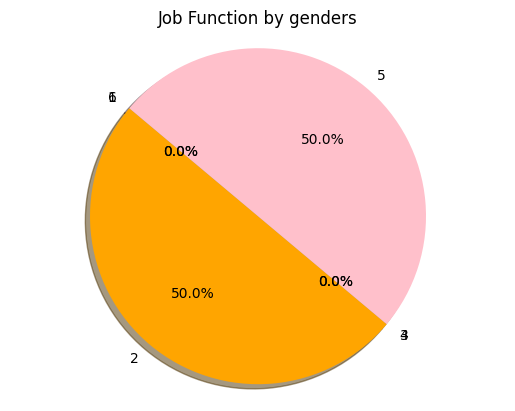

In [91]:
from matplotlib import pyplot as plt
job_functions = [1,2,3,4,5,6 ]
genders = [0,1,0,0,1,0]
colors = ['yellow', 'orange', 'lightblue', 'lightgreen','pink', 'blue']

plt.pie(genders, labels=job_functions, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Add a title
plt.title('Job Function by genders')

# Display the pie chart
plt.show()

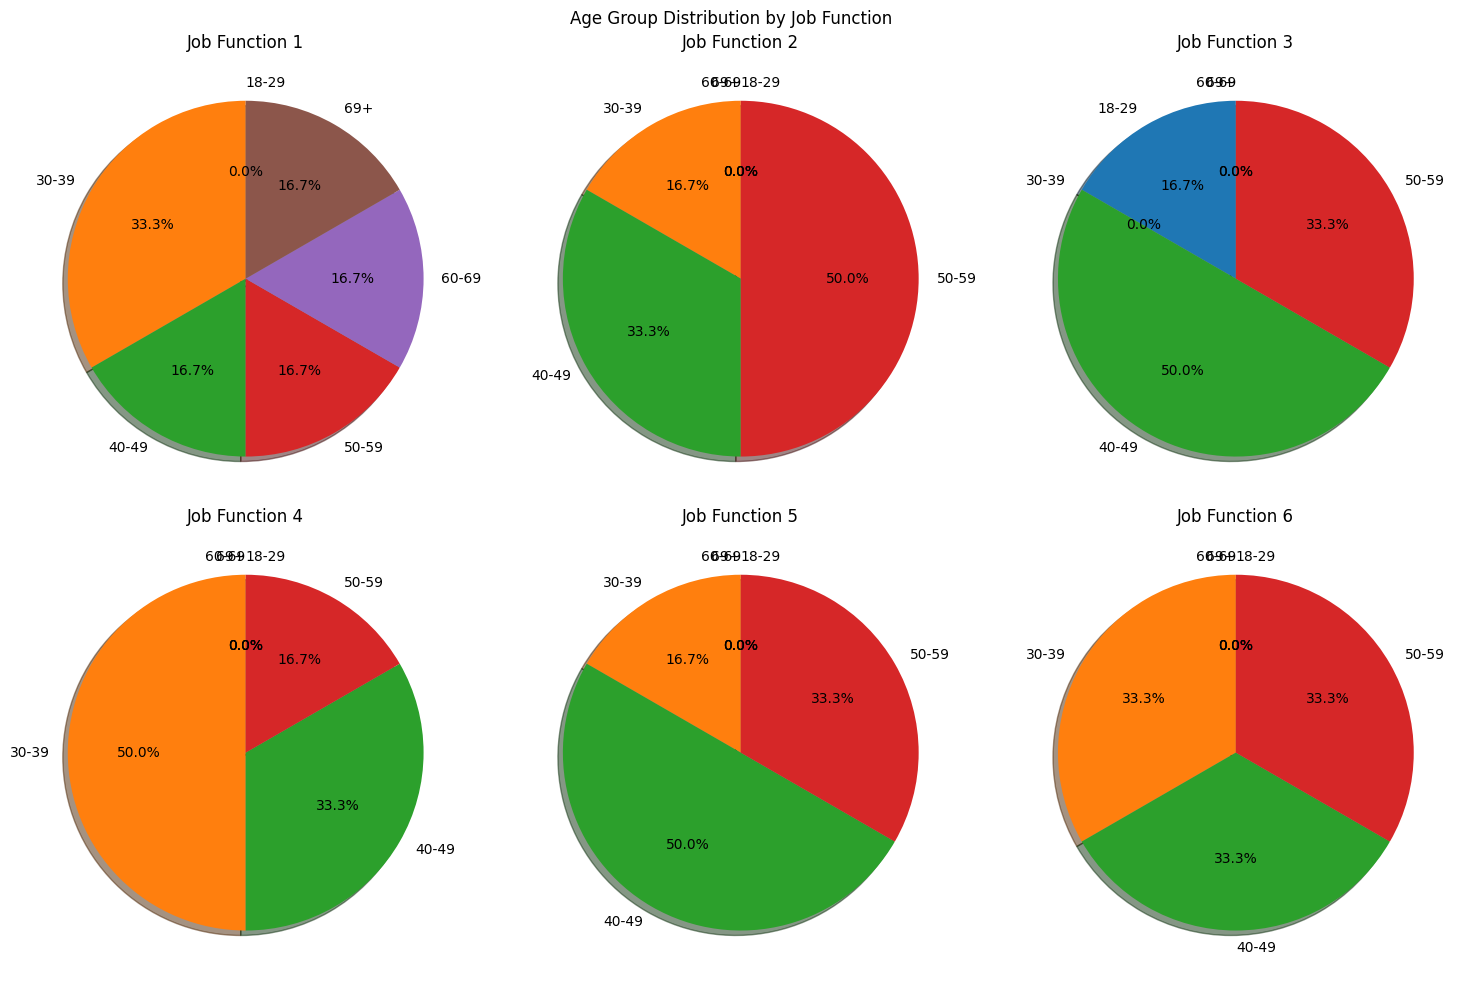

In [92]:

# Sample data
job_functions = [1, 2, 3, 4, 5, 6]  #  job function categories (integers)
age_groups = {
    1: [1, 2, 4, 3, 1, 5],  # age groups for each job function
    2: [1, 3, 2, 2, 3, 3],
    3: [0, 2, 2, 3, 2, 3],
    4: [1, 3, 2, 2, 1, 1],
    5: [1, 2, 2, 3, 2, 3],
    6: [1, 2, 3, 2, 1, 3]
}

# Categorize age groups into bins or ranges
age_bins = ['18-29', '30-39', '40-49', '50-59', '60-69', '69+']
age_categories = {}
for job_function, ages in age_groups.items():
    age_categories[job_function] = []
    for age in ages:
        if age == 5:
            age_categories[job_function].append('69+')
        elif age == 4:
            age_categories[job_function].append('60-69')
        elif age == 3:
            age_categories[job_function].append('50-59')
        elif age == 2:
            age_categories[job_function].append('40-49')
        elif age == 1:
            age_categories[job_function].append('30-39')
        else:
            age_categories[job_function].append('18-29')

# Count the number of occurrences of each age group category for each job function
age_counts = {job_function: [age_categories[job_function].count(category) for category in age_bins] for job_function in job_functions}

# Create the pie charts
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Age Group Distribution by Job Function')

for i, job_function in enumerate(job_functions):
    row = i // 3
    col = i % 3


    axes[row, col].pie(age_counts[job_function], labels=age_bins, autopct='%1.1f%%', startangle=90, shadow=True)
    axes[row, col].set_title(f'Job Function {job_function}')

plt.tight_layout()
plt.show()



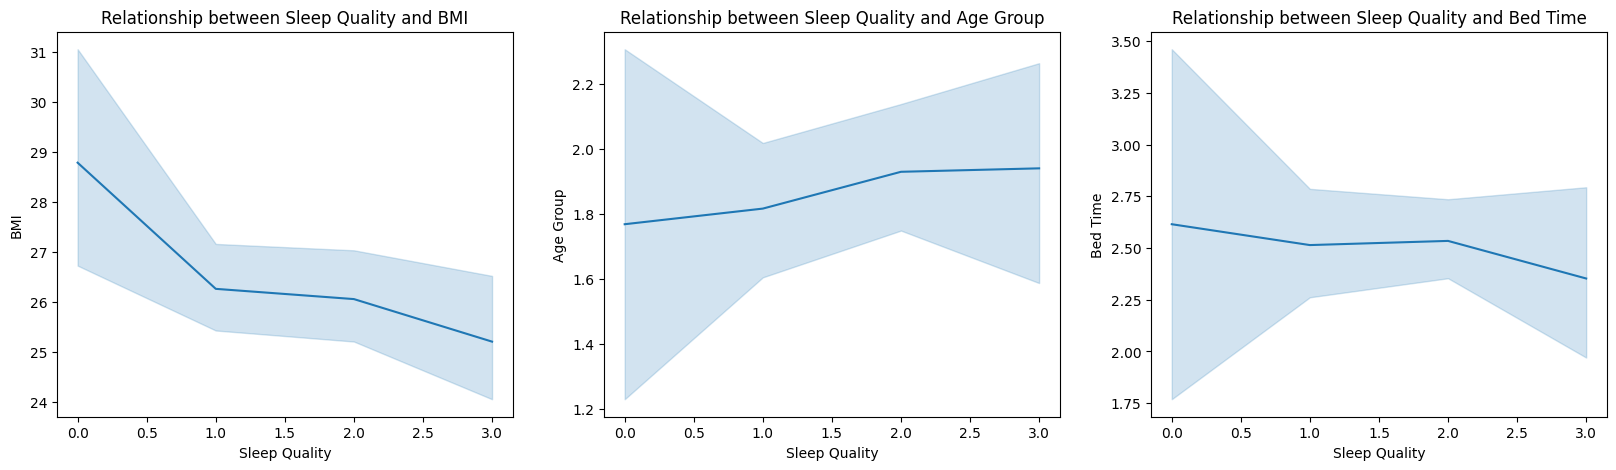

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataset loaded into a DataFrame named 'df'

# Define the order of 'Sleep Quality' for proper plotting
sleep_quality_order = [0, 1, 2, 3]

# Set the 'Sleep Quality' column as a categorical variable with the specified order
df['Sleep Quality'] = pd.Categorical(df['Sleep Quality'], categories=sleep_quality_order, ordered=True)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Plot the line plots with the specified order
sns.lineplot(ax=axes[0], x='Sleep Quality', y='BMI', data=df)
sns.lineplot(ax=axes[1], x='Sleep Quality', y='Age Group', data=df)
sns.lineplot(ax=axes[2], x='Sleep Quality', y='Bed Time', data=df)

axes[0].set_title('Relationship between Sleep Quality and BMI')
axes[1].set_title('Relationship between Sleep Quality and Age Group')
axes[2].set_title('Relationship between Sleep Quality and Bed Time')

plt.show()


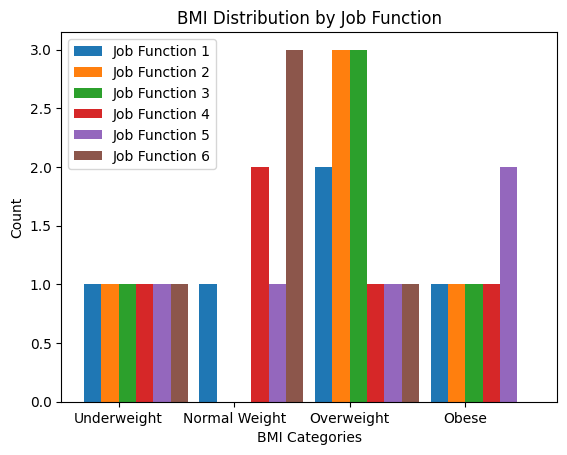

In [94]:
# Sample data
job_functions = [1, 2, 3, 4, 5, 6]  # job function categories (integers)
bmi_values = {
    1: [30.12759924, 26.10150234, 20, 26.12244898],
    2: [26.6727633, 26.36560303, 25.71219869, 32.54800084],
    3: [25.14741589, 26.84061047, 27.04164413, 30.66890496],
    4: [23.32341806, 24.85836513, 33.24083709, 26.26494385],
    5: [23.87543253, 33.15988164, 25.71219869, 45.76442368],
    6: [22.49858277, 19.56823633, 22.03856749, 25.95155709]
}

# Categorize BMI values into bins
bmi_bins = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
bmi_categories = {}
for job_function, values in bmi_values.items():
    bmi_categories[job_function] = []
    for bmi in values:
        if bmi < 18.0:
            bmi_categories[job_function].append('Underweight')
        elif 18.0 <= bmi < 25.0:
            bmi_categories[job_function].append('Normal Weight')
        elif 25.0 <= bmi < 30.0:
            bmi_categories[job_function].append('Overweight')
        else:
            bmi_categories[job_function].append('Obese')

    # Check if the 'Underweight' category is missing and add it with a count of 0
    if 'Underweight' not in bmi_categories[job_function]:
        bmi_categories[job_function].append('Underweight')

# Count the number of occurrences of each BMI category for each job function
bmi_counts = {job_function: [bmi_categories[job_function].count(category) for category in bmi_bins] for job_function in job_functions}

# Create the bar graphs
width = 0.15
x = range(len(bmi_bins))
num_job_functions = len(job_functions)
color_map = plt.get_cmap('tab10')  # Use tab10 color map for more than 6 job functions

fig, ax = plt.subplots()

for i, job_function in enumerate(job_functions):
    color = color_map(i % num_job_functions)  # Get the color based on the job function index
    ax.bar([pos + i * width for pos in x], bmi_counts[job_function], width=width, label=f'Job Function {job_function}', color=color)

ax.set_xticks([pos + 1.5 * width for pos in x])
ax.set_xticklabels(bmi_bins)
ax.set_xlabel('BMI Categories')
ax.set_ylabel('Count')
ax.set_title('BMI Distribution by Job Function')
ax.legend()

plt.show()




FEATURE SELECTION

In [98]:
from sklearn.feature_selection import SelectKBest, f_classif

# Create an instance of SelectKBest with the desired number of features to keep
num_features_to_keep = 4  # Adjust this value as needed
selector = SelectKBest(score_func=f_classif, k=num_features_to_keep)

# Apply feature selection to your scaled or standardized data
X_selected = selector.fit_transform(X_standardized, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Extract the names of the selected features
selected_feature_names = [feature_columns[i] for i in selected_feature_indices]

In [99]:
# Print the names of the selected features
print("Selected Features:", selected_feature_names)

Selected Features: ['Job Function', 'BMI', 'Bed Time', 'Sleep Latency']


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load the dataset (replace with your own dataset)
data = load_iris()
X = data.data
y = data.target

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=70, random_state=230)

# Fit the model on the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: Importance = {importance:.4f}")


Feature 1: Importance = 0.0612
Feature 2: Importance = 0.0221
Feature 3: Importance = 0.4942
Feature 4: Importance = 0.4225


In [102]:
# Create the feature DataFrame (X)
X = df_2[feature_columns]
# Create the target variable Series (y)
y = df_2['Sleep Quality']


In [105]:

 #Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=230)

In [106]:
# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict using the trained model
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5811


SVM CLASSIFIER

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an instance of the SVM classifier
svm = SVC(kernel="linear", gamma=0.06, C=0.3,random_state=230,degree=5)


In [108]:
# Perform cross-validation and obtain accuracy scores
scores = cross_val_score(svm, X_train, y_train, cv=6)  # Change cv to the desired number of folds

In [109]:
# Print the results
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.06


In [110]:
svm.fit(X_train,y_train)

SVC(C=0.3, degree=5, gamma=0.06, kernel='linear', random_state=230)

In [50]:
y_pred = svm.predict(X_test)

In [111]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of SVM: {accuracy:.2f}')

Accuracy of SVM: 0.58


RANDOM FOREST

In [115]:
# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=230)

In [120]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30,40,50,60,70],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['auto', 'sqrt', 'log2']
    }


In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=230),
             n_jobs=-1,
             param_grid={'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70]})

In [122]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
# Hyperparameters
criterion = 'entropy'  # Criterion for splitting ('gini' or 'entropy')
max_depth = None     # Maximum depth of the tree
min_samples_split = 5  # Minimum number of samples required to split an internal node
min_samples_leaf = 2   # Minimum number of samples required to be at a leaf node

# Create the Decision Tree classifier with the specified hyperparameters
dectree = DecisionTreeClassifier(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=230
)
from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
num_folds =10

# Define the cross-validation method (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=230)

# Perform cross-validation and get the scores for each fold
scores = cross_val_score(dectree, X_train, y_train, cv=kfold)

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
dectree.fit(X_train, y_train)


Scores for each fold: [0.52173913 0.40909091 0.5        0.5        0.63636364 0.54545455
 0.59090909 0.45454545 0.59090909 0.31818182]
Mean score: 0.5067193675889328


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, random_state=230)

In [123]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
# Hyperparameters
n_estimators = 70     # Number of decision trees in the forest
criterion = 'entropy'  # Criterion for splitting ('gini' or 'entropy')
max_depth = None     # Maximum depth of the trees
min_samples_split = 5  # Minimum number of samples required to split an internal node
min_samples_leaf = 2  # Minimum number of samples required to be at a leaf node
random_state = 230     # Random seed for reproducibility

# Create the Random Forest classifier with the specified hyperparameters
ranfor = RandomForestClassifier(
    n_estimators=n_estimators,
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

from sklearn.model_selection import cross_val_score, KFold
# Define the number of folds for cross-validation
num_folds = 10

# Define the cross-validation method (KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=230)

# Perform cross-validation and get the scores for each fold
scores = cross_val_score(ranfor, X_train, y_train, cv=kfold)

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
ranfor.fit(X_train, y_train)

Scores for each fold: [0.60869565 0.63636364 0.72727273 0.54545455 0.68181818 0.5
 0.54545455 0.59090909 0.59090909 0.54545455]
Mean score: 0.5972332015810278


RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=70, random_state=230)

In [124]:
# Making predictions on test dataset
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)


In [125]:
# Evaluating using accuracy_score metric
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)


In [126]:
print("Disicion Tree: " + str(accuracy_ranfor * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Disicion Tree: 62.16216216216216
Random Forest: 62.16216216216216


Artificial neural network

In [127]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping

In [128]:
num_classes = max(y_train) + 1  # Number of classes in your dataset (4 in this case)

In [129]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Use softmax for multiclass

In [130]:
# Compile the model with categorical_crossentropy loss and 'adam' optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
from keras.utils import to_categorical

# One-hot encode the target variable
y_train_onehot = to_categorical(y_train, num_classes=num_classes)
y_test_onehot = to_categorical(y_test, num_classes=num_classes)


In [132]:
from keras.callbacks import EarlyStopping
import numpy as np
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train_onehot, epochs=100, batch_size=20, validation_split=0.3, callbacks=[early_stop], verbose=1)


Epoch 1/100
8/8 [==============================] - 1s 32ms/step - loss: 1.2283 - accuracy: 0.4481 - val_loss: 1.2161 - val_accuracy: 0.3582
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 1.1384 - accuracy: 0.4870 - val_loss: 1.0568 - val_accuracy: 0.5522
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.0764 - accuracy: 0.5390 - val_loss: 1.0292 - val_accuracy: 0.5672
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0399 - accuracy: 0.5779 - val_loss: 1.0414 - val_accuracy: 0.5075
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0136 - accuracy: 0.5714 - val_loss: 0.9751 - val_accuracy: 0.6119
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.9915 - accuracy: 0.5974 - val_loss: 0.9896 - val_accuracy: 0.5522
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9903 - accuracy: 0.5844 - val_loss: 0.9775 - val_accuracy: 0.5672
Epoch 8/100
8/8 [=========

In [133]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=-1)  # Convert probabilities to class labels



3/3 [==============================] - 0s 4ms/step


In [134]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of ANN: {accuracy:.2f}')


Accuracy of ANN: 0.68


RESEMBLE METHODS

In [135]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Create instances of the classifiers
svm = SVC(kernel="linear", gamma=0.03, C=0.3, random_state=230)
random_forest = RandomForestClassifier(n_estimators=500, random_state=230)
ann = MLPClassifier(hidden_layer_sizes=(100, 60), activation='relu', random_state=230)

# Perform cross-validation and obtain accuracy scores
svm_scores = cross_val_score(svm, X_train, y_train, cv=6)  # Change cv to the desired number of folds
rf_scores = cross_val_score(random_forest, X_train, y_train, cv=6)  # Change cv to the desired number of folds
ann_scores = cross_val_score(ann, X_train, y_train, cv=6)  # Change cv to the desired number of folds




In [136]:
# Print the results
print("Support Vector Machine Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (svm_scores.mean(), svm_scores.std()))

print("Random Forest Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (rf_scores.mean(), rf_scores.std()))

print("Artificial Neural Network Classifier:")
print("%0.2f accuracy with a standard deviation of %0.2f" % (ann_scores.mean(), ann_scores.std()))

Support Vector Machine Classifier:
0.64 accuracy with a standard deviation of 0.06
Random Forest Classifier:
0.60 accuracy with a standard deviation of 0.06
Artificial Neural Network Classifier:
0.52 accuracy with a standard deviation of 0.07
